In [16]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

Imagine we are targeting a specific black hole with initial known mass ($50 M_\odot$) and spin (0.7), at a distance of 5 Mpc:

In [17]:
bh = physics.BlackHole(mass=50, chi=0.7, msun=True)
distance = 5E6 * physics.PC_SI

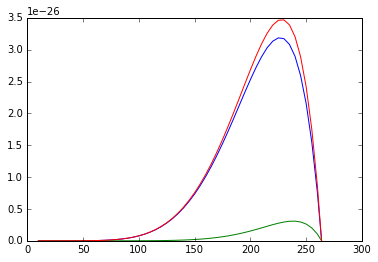

In [18]:
fgws = np.arange(10, 300, 5)

h02 = bh.h0r_fit(fgws)/distance
h03 = bh.h0r_fit(fgws, lgw=3)/distance

plt.plot(fgws, h02)
plt.plot(fgws, h03)
plt.plot(fgws, h02+h03)
plt.ylim(0, max(h02)*1.1)
plt.show()

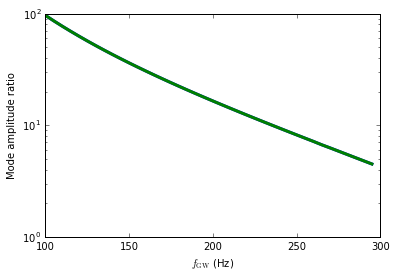

In [33]:
plt.plot(fgws, h02/h03, lw=3)
plt.xlim(100, 300)
plt.ylim(1, 1E2)
plt.yscale('log')
plt.xlabel(r"$f_{\rm GW}$ (Hz)")
plt.ylabel('Mode amplitude ratio')
plt.show()

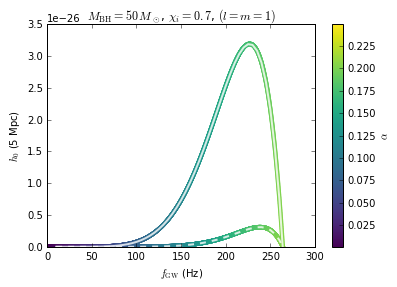

In [26]:
da = 0.0001
fig, ax = plt.subplots()
for lgw in [2, 3]:
    h0rs_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.25, delta_alpha=da, lgw=lgw)
    h0s_loc = h0rs_loc / distance
    s = ax.scatter(fgws_loc, h0s_loc, c=alphas_loc, edgecolor='none', cmap='viridis')
plt.plot(fgws, h02, lw=2, color='w', alpha=0.8)
plt.plot(fgws, h03, lw=2, color='w', alpha=0.8, ls='--')
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_xlim(0, 300)
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=50\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.legend(loc="upper left")
plt.show()
plt.close()